/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_96006/1649314436.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_96006/1649314436.py:75: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_96006/1649314436.py:102: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


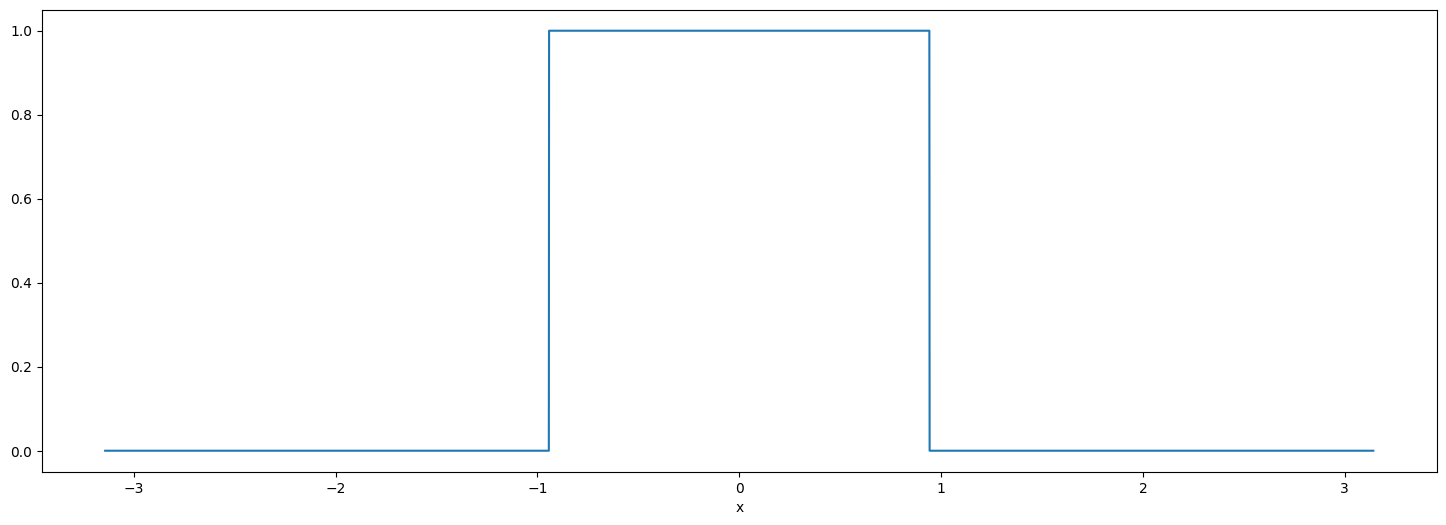

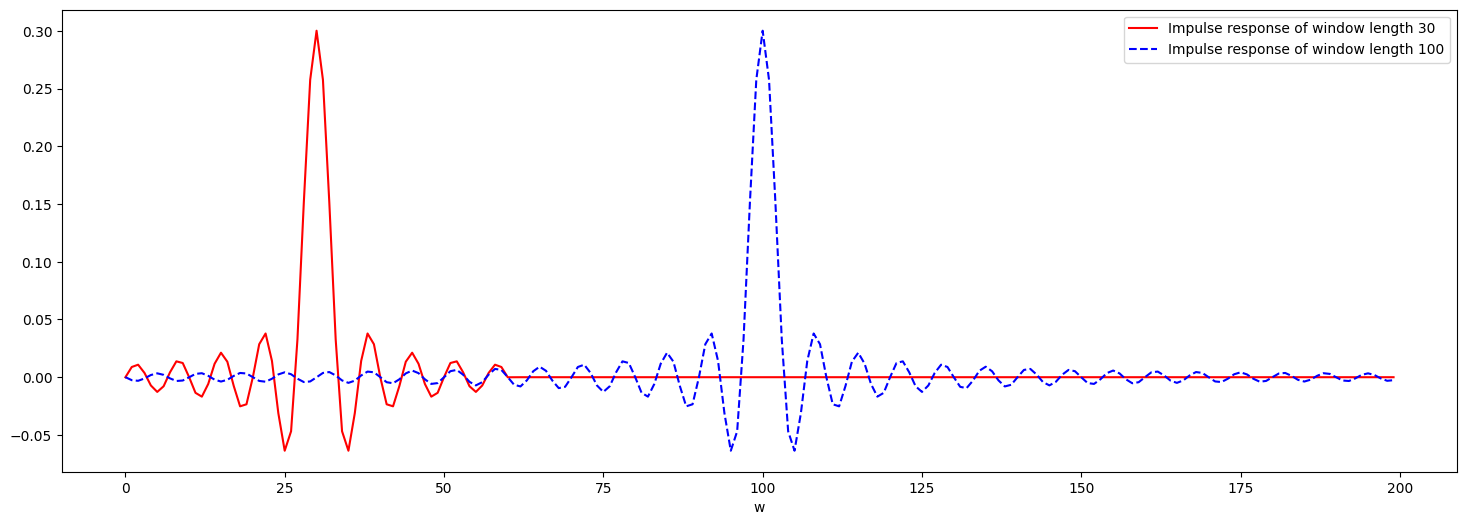

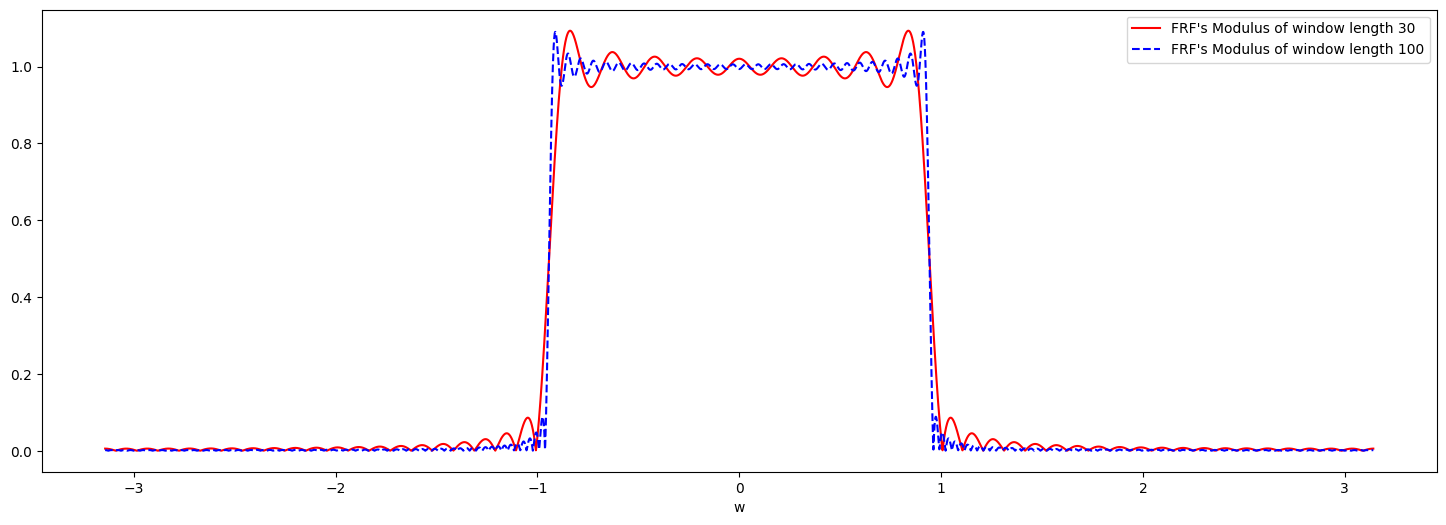

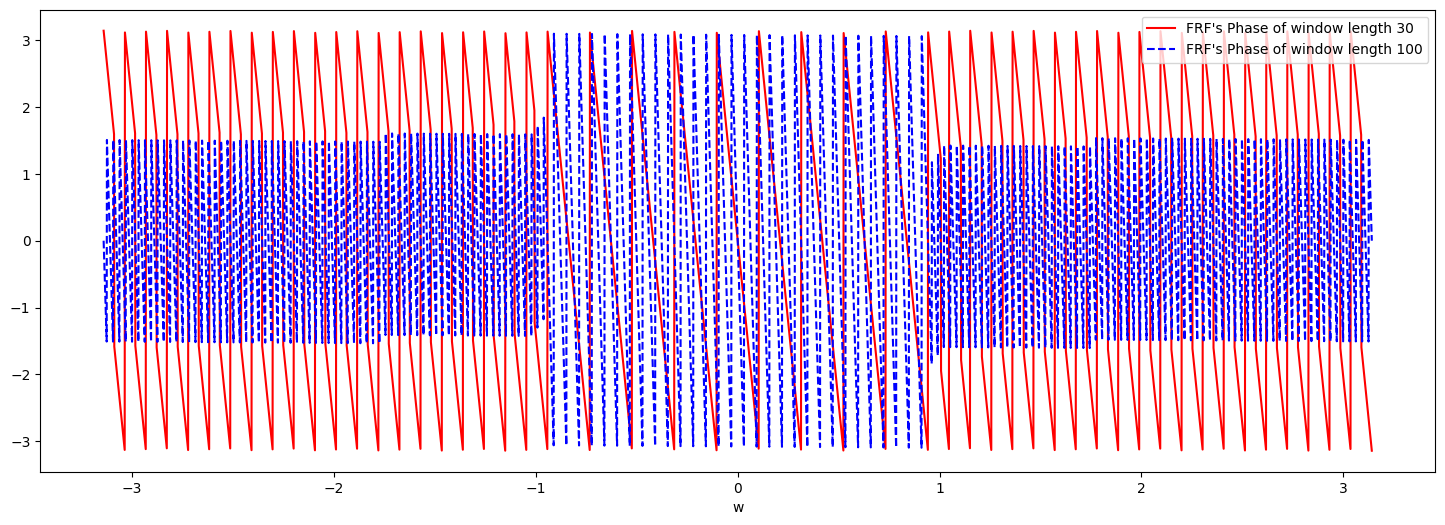

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def expand(arr, n):
    return np.pad(arr, (0, n - len(arr)), 'constant')

def get_mod_pha_real_imag(c):
    return np.abs(c), np.angle(c), c.real, c.imag

def gen_g(d, h):
    def g(t):
        return np.where((t >= -d) & (t <= d), h, 0)
    return g

W_C = 0.3 * np.pi
low_pass_g = gen_g(W_C, 1)

SAMPLE_N = 5000
def discret_samples(f, d):
    t_values = np.linspace(-d, d, SAMPLE_N)
    return t_values, f(t_values)

def __draw(xs, ys):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(xs, ys)
    plt.xlabel('x')
    fig.show()
    
def __draw_ys(ys):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(ys)
    plt.xlabel('x')
    fig.show()
    
__draw(*discret_samples(low_pass_g, np.pi))

def idtft_window(minn, maxn, dtft_func):
    ns = np.arange(minn, maxn + 1)
    hs = np.zeros_like(ns, dtype=complex)
    w_samples, f_samples = discret_samples(dtft_func, np.pi)
    dw = w_samples[1] - w_samples[0]
    for i in range(len(ns)):
        hs[i] = 1 / (2 * np.pi) * np.sum(f_samples * np.exp(1j * ns[i] * w_samples) * dw)
    return ns, hs # hs itself is causal

ns, hs = idtft_window(-30, 30, low_pass_g)
__draw(ns, hs)

def filter(bz, x, L):
    ...
    # y[n] = 
    xs = expand(x, L) # first several x
    ys = np.zeros_like(xs)
    def y_at(n):
        return 0 if n < 0 else ys[n]
    def x_at(n):
        return 0 if n < 0 else xs[n]
    for n in range(L):
        # calculate y[n]
        ys[n] = sum([bz[i] * x_at(n - i) for i in range(len(bz))])
    return xs, ys

fig = plt.figure(figsize=(18, 6))
test_n = [30, 100]
colors = ['r-', 'b--']
for j in range(len(test_n)):
    n = test_n[j]
    ns, hs = idtft_window(-n, n, low_pass_g)
    bz = hs
    impulse_xs = np.array([1 + 0j])
    L = 200
    xs, ys = filter(bz, impulse_xs, L)
    plt.plot(np.arange(L), ys, colors[j],label=f'Impulse response of window length {n}'),
plt.xlabel('w')
plt.legend()
fig.show()

def cap_h_value(bz, z: complex):
    num = sum([bz[i] * z ** (-i) for i in range(len(bz))])
    den = 1
    return num / den

def frequency_response(bz):
    ws = np.linspace(-np.pi, np.pi, SAMPLE_N)
    cap_hs = np.array([cap_h_value(bz, np.exp(1j * omega)) for omega in ws])
    return ws, cap_hs
    

prop_desc = ['Modulus', 'Phase']
for i in range(2):
    fig = plt.figure(figsize=(18, 6))
    test_n = [30, 100]
    colors = ['r-', 'b--']
    for j in range(len(test_n)):
        n = test_n[j]
        ns, hs = idtft_window(-n, n, low_pass_g)
        bz = hs
        ws, cap_hs = frequency_response(bz)
        hs_plots = get_mod_pha_real_imag(cap_hs)
        plt.plot(ws, hs_plots[i], colors[j],label=f'FRF\'s {prop_desc[i]} of window length {n}'),
    plt.xlabel('w')
    plt.legend()
    fig.show()


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_96006/1649314436.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_96006/1609094480.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_96006/1609094480.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


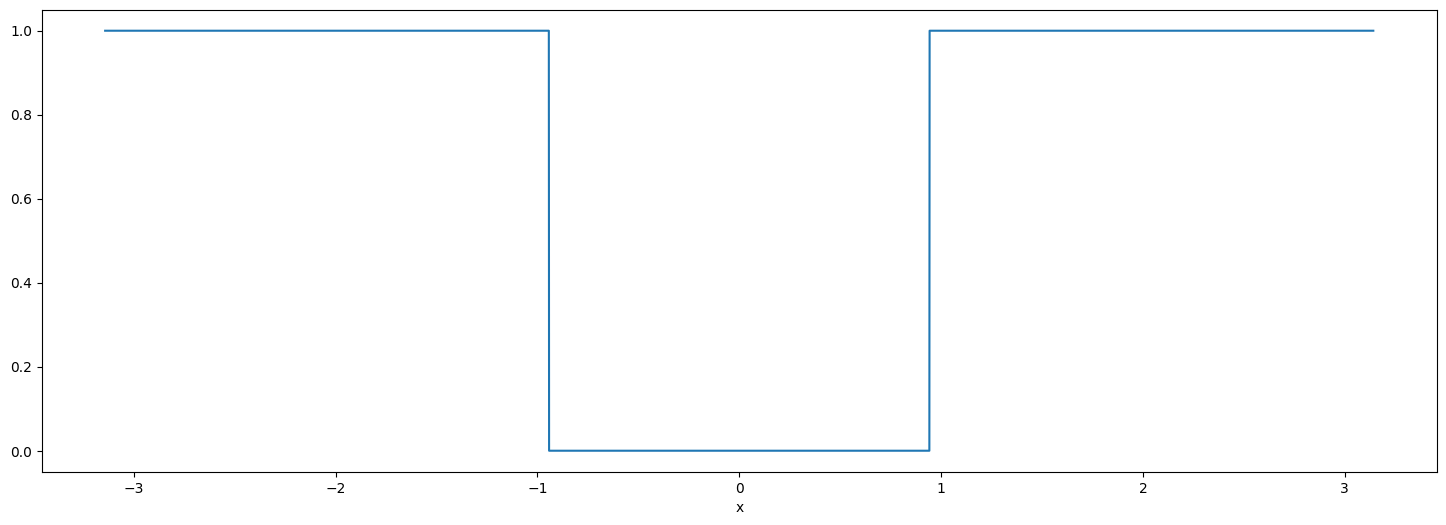

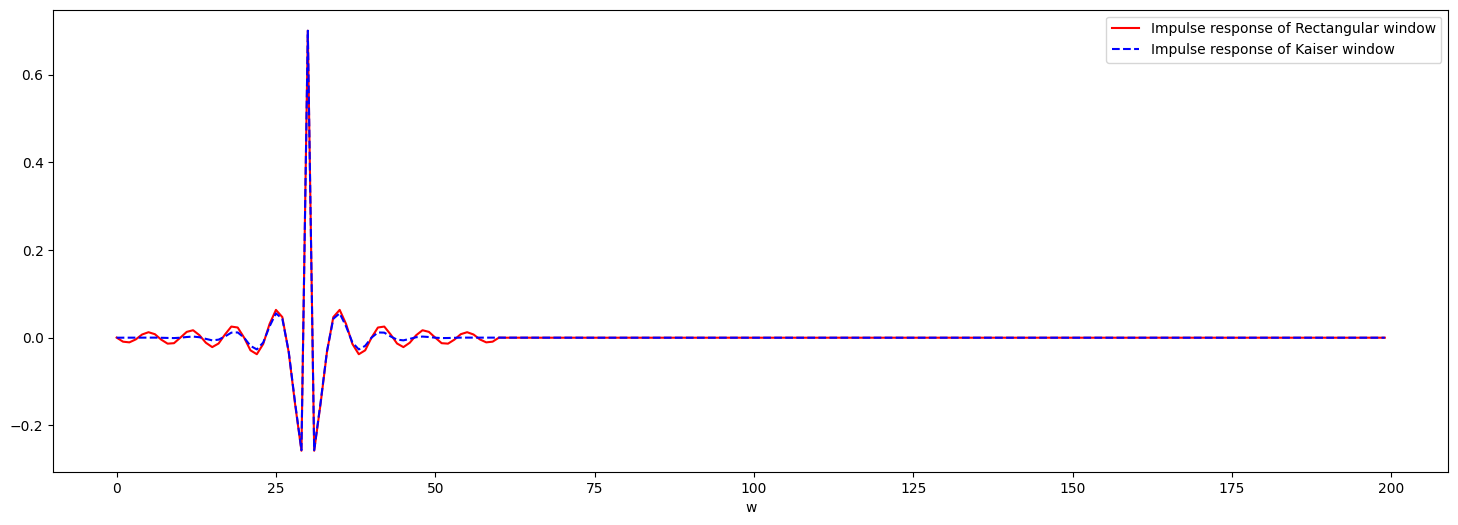

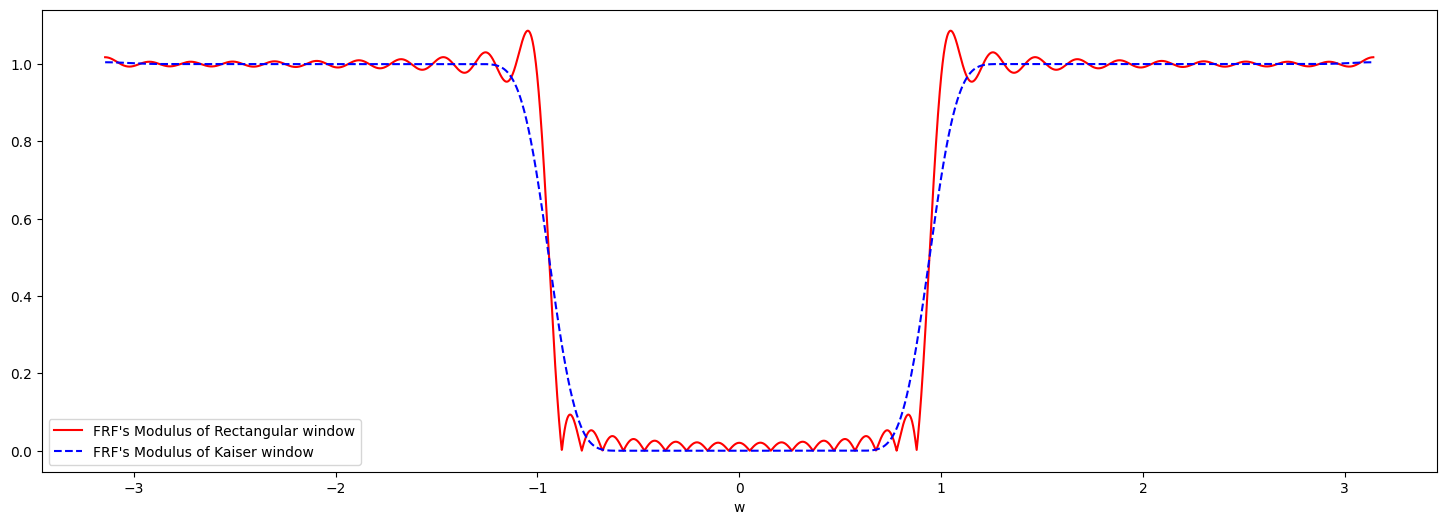

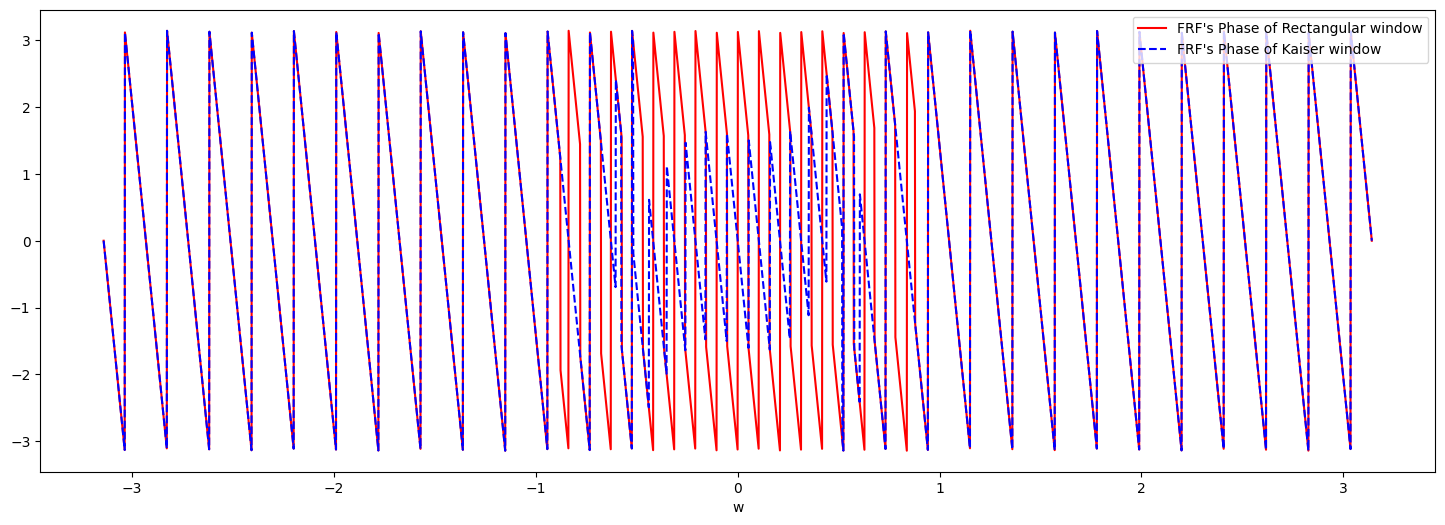

In [19]:
def gen_pit(d, h):
    def g(t):
        return np.where((t <= -d) | (t >= d), h, 0)
    return g

high_pass_g = gen_pit(W_C, 1)
__draw(*discret_samples(high_pass_g, np.pi))

WINDOW_N = 61
ns, hs = idtft_window(-30, 30, high_pass_g)
# print(hs)
kaiser_hs = np.kaiser(WINDOW_N, beta=10) * hs
window_names = ['Rectangular', 'Kaiser']

fig = plt.figure(figsize=(18, 6))
colors = ['r-', 'b--']
for i in range(2):
    bz = hs if i == 0 else kaiser_hs
    impulse_xs = np.array([1 + 0j])
    L = 200
    xs, ys = filter(bz, impulse_xs, L)
    plt.plot(np.arange(L), ys, colors[i], label=f'Impulse response of {window_names[i]} window'),
plt.xlabel('w')
plt.legend()
fig.show()

prop_desc = ['Modulus', 'Phase']
for i in range(2):
    fig = plt.figure(figsize=(18, 6))
    colors = ['r-', 'b--']
    for j in range(2):
        bz = hs if j == 0 else kaiser_hs
        ws, cap_hs = frequency_response(bz)
        hs_plots = get_mod_pha_real_imag(cap_hs)
        plt.plot(ws, hs_plots[i], colors[j], label=f'FRF\'s {prop_desc[i]} of {window_names[j]} window'),
    plt.xlabel('w')
    plt.legend()
    fig.show()


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_96006/4170912141.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


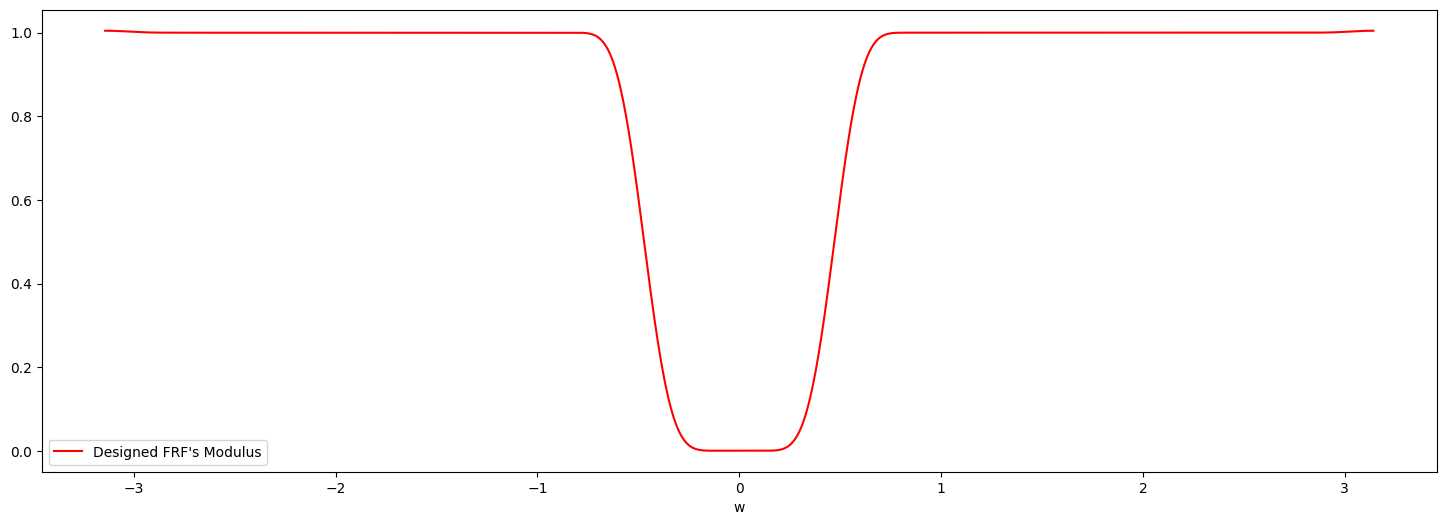

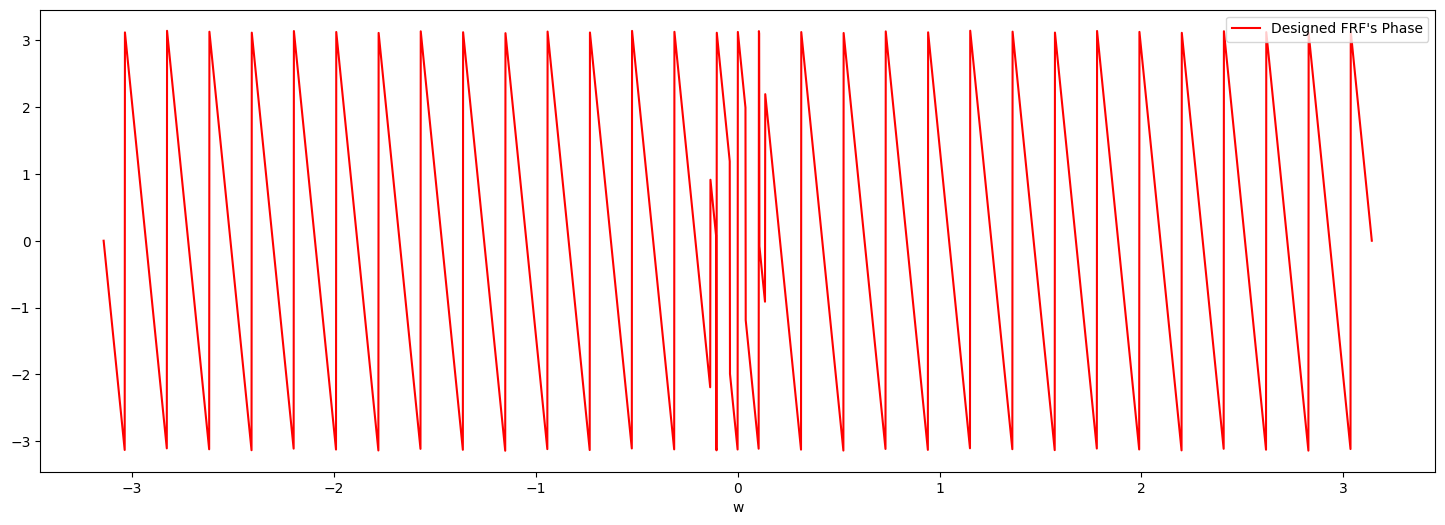

In [24]:
f_s = 200
f_c = 15
w_c = 2 * np.pi * f_c / f_s
# [pit]
high_pass_g = gen_pit(w_c, 1)
# [idtft]
ns, hs = idtft_window(-30, 30, high_pass_g)
kaiser_hs = np.kaiser(WINDOW_N, beta=10) * hs
# [draw frequency response]
prop_desc = ['Modulus', 'Phase']
for i in range(2):
    fig = plt.figure(figsize=(18, 6))
    bz = kaiser_hs
    ws, cap_hs = frequency_response(bz)
    hs_plots = get_mod_pha_real_imag(cap_hs)
    plt.plot(ws, hs_plots[i], 'r-', label=f'Designed FRF\'s {prop_desc[i]}'),
    plt.xlabel('w')
    plt.legend()
    fig.show()

/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_96006/1649314436.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  ys[n] = sum([bz[i] * x_at(n - i) for i in range(len(bz))])
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_96006/3811687661.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


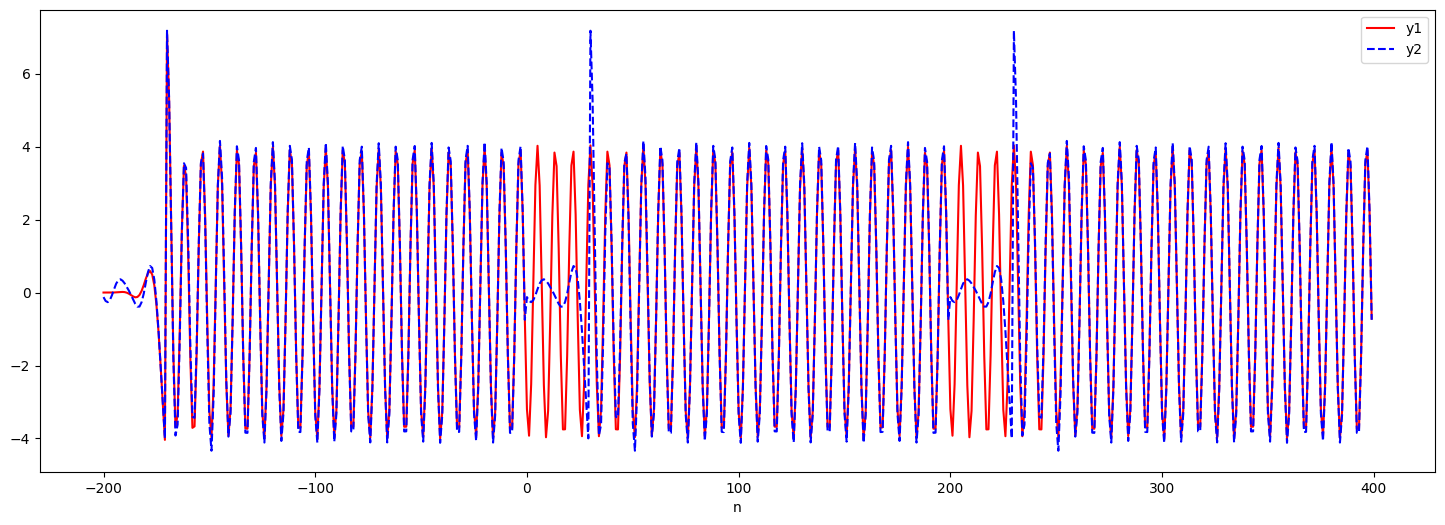

In [34]:
a_1 = 8
a_2 = 4
f_1 = 7
f_2 = 24
T = 1 / f_s
ns = np.arange(-200, 400)
xs = a_1 * np.cos(2 * np.pi * f_1 * T * ns) + a_2 * np.cos(2 * np.pi * f_2 * T * ns)
xs, ys = filter(kaiser_hs, xs, len(xs))

blocks = [xs[i:i + 200] for i in range(0, len(xs), 200)]
blocks_ys = [np.convolve(hs, block)[:200] for block in blocks] # for a 200 block, length is 200 + len(hs) - 1, the last several is removed
pieced_ys = np.concatenate(blocks_ys)

fig = plt.figure(figsize=(18, 6))
plt.plot(ns, ys, 'r-', label=f'y1'),
plt.plot(ns, pieced_ys, 'b--', label=f'y2'),
plt.xlabel('n')
plt.legend()
fig.show()

/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_96006/2949881905.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


The amplitude of the remaining of frequency 24 is 3.7877329255465346


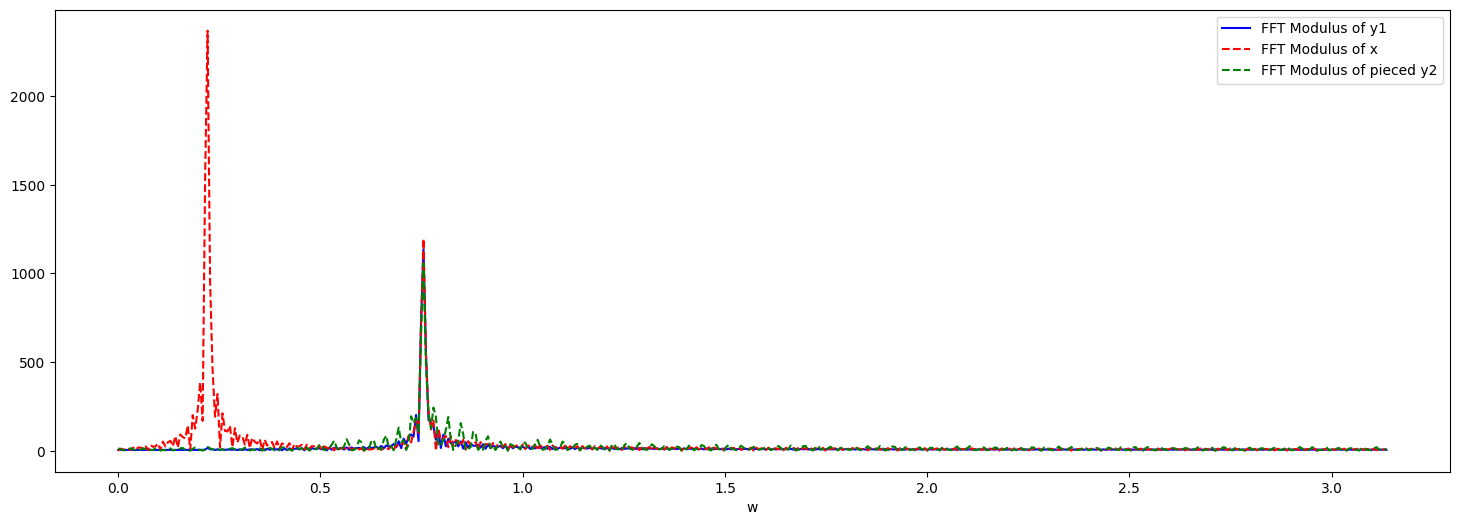

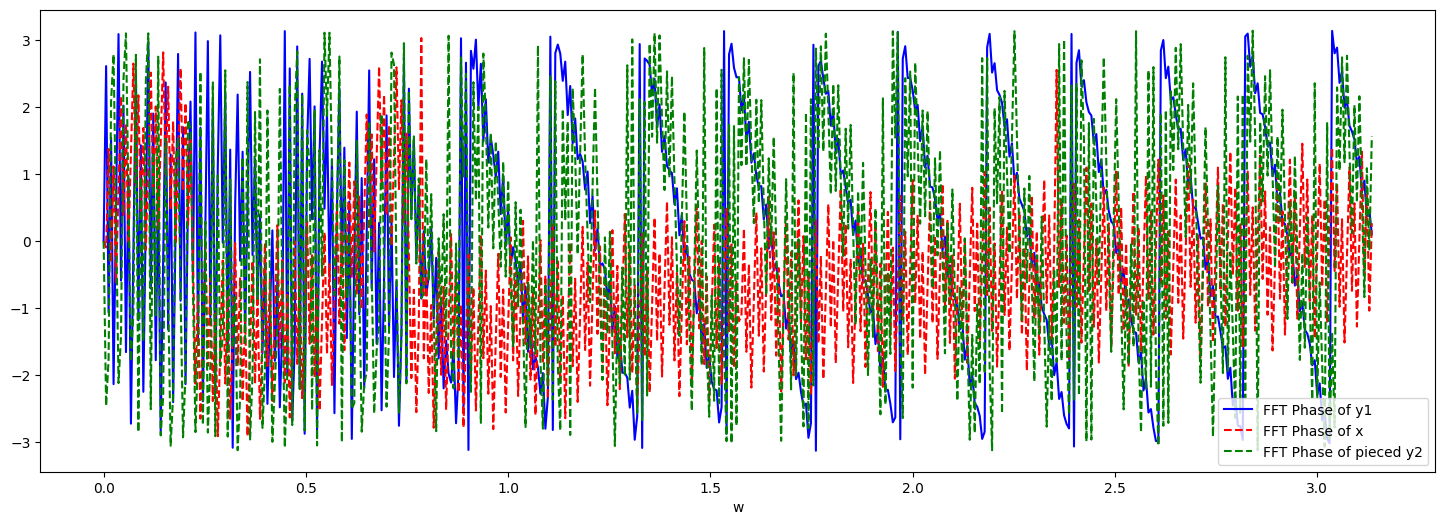

In [39]:
FFT_N = 1024
pad_x = np.arange(FFT_N)
pad_w = np.array([2 * np.pi * k / FFT_N for k in range(FFT_N)])
pad_ys = expand(ys, FFT_N)
pad_xs = expand(xs, FFT_N)
pad_pieced_ys = expand(pieced_ys, FFT_N)

fft_ys = np.fft.fft(pad_ys)
fft_xs = np.fft.fft(pad_xs)
fft_pieced_ys = np.fft.fft(pad_pieced_ys)

for part in range(2):
    fig = plt.figure(figsize=(18, 6))
    fft_ys_plots = get_mod_pha_real_imag(fft_ys)
    fft_xs_plots = get_mod_pha_real_imag(fft_xs)
    fft_pieced_ys_plots = get_mod_pha_real_imag(fft_pieced_ys)

    half = FFT_N // 2
    plt.plot(pad_w[:half], fft_ys_plots[part][:half], 'b-', label=f'FFT {prop_desc[part]} of y1')
    plt.plot(pad_w[:half], fft_xs_plots[part][:half], 'r--', label=f'FFT {prop_desc[part]} of x')
    plt.plot(pad_w[:half], fft_pieced_ys_plots[part][:half], 'g--', label=f'FFT {prop_desc[part]} of pieced y2')
    plt.legend()
    plt.xlabel('w')
    fig.show()
    
print(f'The amplitude of the remaining of frequency 24 is {max(fft_ys_plots[0]) / 600 * 2}')